In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

#### Convergence of integral with two sticks both having lengths less than 0.5

In [2]:
d1 = 0.2
d2 = 0.4

In [3]:
def exact(d1, d2):
    return (1/3 * d1**3 + d1**2*d2 - d1**2 + 2*d1*d2**2 - 3*d1*d2 + d1 - d2**2 + d2) / ((1-d1)*(1-d2))

In [4]:
def short_stick_prob(x, d):
    '''
    Probability of a point x in [0,1] being hit by a stick of length d <= 0.5
    '''
    if x <= d:
        return x / (1 - d)
    elif x <= 1 - d:
        return d / (1 - d)
    else:
        return (1 - x) / (1 - d)
    
def long_stick_prob(x, d):
    '''
    Probability of a point x in [0,1] being hit by a stick of length d > 0.5
    '''
    if x <= 1 - d:
        return x / (1 - d)
    elif x <= d:
        return 1
    else:
        return (1 - x) / (1 - d)
    
def stick_prob(x,d):
    '''
    Probability of a point x in [0,1] being hit by a stick of length d (> 0)
    '''
    if d <= 0.5:
        return short_stick_prob(x,d)
    else:
        return long_stick_prob(x,d)

def trapezoidal(f, a=0, b=1, n=4):
    '''
    Assuming equidistant spacing
    '''
    dx = (b-a) / n
    xk = torch.linspace(a, b, n+1)
    int = torch.tensor(0.0)
    int += (f(xk[0]) + f(xk[-1]))
    for i in range(1,n):
        int += 2 * f(xk[i])
    int = int * dx / 2
    return int

def f(d1, d2):
    return lambda x : 1 - (1-stick_prob(x,d1))*(1-stick_prob(x,d2))

In [5]:
# Testing for different choices of n
d1_list = [0.1, 0.1, 0.3, 0.2, 0.2, 0.3]
d2_list = [0.4, 0.2, 0.4, 0.3, 0.4, 0.5]
n_list = torch.arange(1,31, 5)
errors = []
for d1, d2 in zip(d1_list, d2_list):
    numerical = [trapezoidal(f(d1, d2), 0, 1, n) for n in n_list]
    exact_ = exact(d1, d2)
    error = [abs(exact_ - num) for num in numerical]
    errors.append(error)

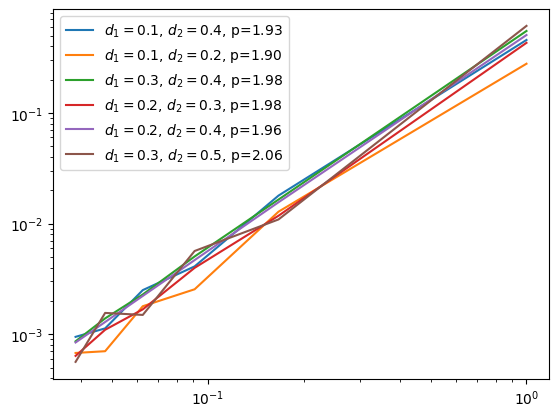

In [7]:
# plt.plot([1,20], [exact, exact], 'k', label = 'exact')
# plt.plot(n_list, numerical, label = 'trapezoidal')
orders = []
for i, error in enumerate(errors):
    orders.append(np.polyfit(np.log(1/np.array(n_list)), np.log(np.array(error)), 1)[0])
    plt.loglog([1/n for n in n_list], error, label=f"$d_1=${d1_list[i]}, $d_2=${d2_list[i]}, p={orders[i]:.2f}")
    
plt.legend()
plt.show()

Convergence order seem to be close to 2 for all choices of $d_1$ and  $d_2$. This matches with theory.